In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .4)


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv', header=None)

- Here we observed that the raw data from our dataset does not include feature names. Therefore, when I load the dataset, I set the header parameter to None.

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


- Now I named the feature columns one by one for our easy manipulation.

In [4]:
# Rename the feature names
df.columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','class']

In [5]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


- Here I observe the first five rows from our dataset.

In [6]:
df.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


- Here I observe the last five rows from our dataset.

In [7]:
df['class'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: class, dtype: int64

- Here we predict the two classes, window glass and non window glass.But here I observed that this target vaiable is classified into multiclass. Therefore I need to convert the target variable into binary classification(Classes 1-4 are Window Glasses whereas Classes 5-7 are Non-Window Glasses).

In [8]:
def analyzed_data(df):
    #check the shape of dataset
    print('The shape of the dataset is :', df.shape)
    print('-'*40, '\n')
    
    # check the missing value of the dataset
    missing_values = df.isnull().sum()
    print('Total Missing Value : ')
    print('---------------------')
    print(missing_values.to_frame('Count of Missing Values'))
    print('\n')
    
    #check the datatpes
    type_of_data = df.dtypes
    print('List of DataTypes in Dataset :')
    print('--------------------------')
    print(type_of_data.to_frame('list of Data Type'))
    print('\n')
    
    #check unique values
    count_of_unique = df.nunique()
    print('Total Unique Value Count :')
    print('-----------------------')
    print(count_of_unique.to_frame('Total Count'))
    print('\n')
    
    #check duplicate values
    duplicated_value = df.duplicated().sum()
    print('Total Duplicate Value')
    print('---------------------')
    print(duplicated_value)

In [9]:
analyzed_data(df)

The shape of the dataset is : (214, 11)
---------------------------------------- 

Total Missing Value : 
---------------------
       Count of Missing Values
Id                           0
RI                           0
Na                           0
Mg                           0
Al                           0
Si                           0
K                            0
Ca                           0
Ba                           0
Fe                           0
class                        0


List of DataTypes in Dataset :
--------------------------
      list of Data Type
Id                int64
RI              float64
Na              float64
Mg              float64
Al              float64
Si              float64
K               float64
Ca              float64
Ba              float64
Fe              float64
class             int64


Total Unique Value Count :
-----------------------
       Total Count
Id             214
RI             178
Na             142
Mg              94
Al  

- By observe that the dataset has 214 observations.
- By observe The dataset is complete with no missing values. This indicates good data quality.
- By observe that,
        There are two columns with integer data types
        The remaining columns are all floating-point numbers, indicating they represent continuous variables.
- After using df.nunique(), which returns the number of unique values in each column of a DataFrame
- Here we check the total duplicate values and observe that No duplicate records found in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  class   214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


- Here I observed that our target variable datatype is integer and then it converts into categorical datatypes.
- And 'Id' columns has no use in this analysis, So drop this column.

In [11]:
df.drop('Id', axis=1, inplace=True)

In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


By observe the statistical summary,
  - the column RI there doesn't seems to be any extreme skewness present, slightly skewed.
   - the Mean value is greater than Median in Na, AI, Ca, Ba, Fe columns which means the data is right skewed.(Mean > Median)
         - the Median is greater than Mg, Si, K columns which means the data is left skewed.(Mean < Median)
            - observe the difference of max and 75% value so it may have outliers.

Univariate Analysis

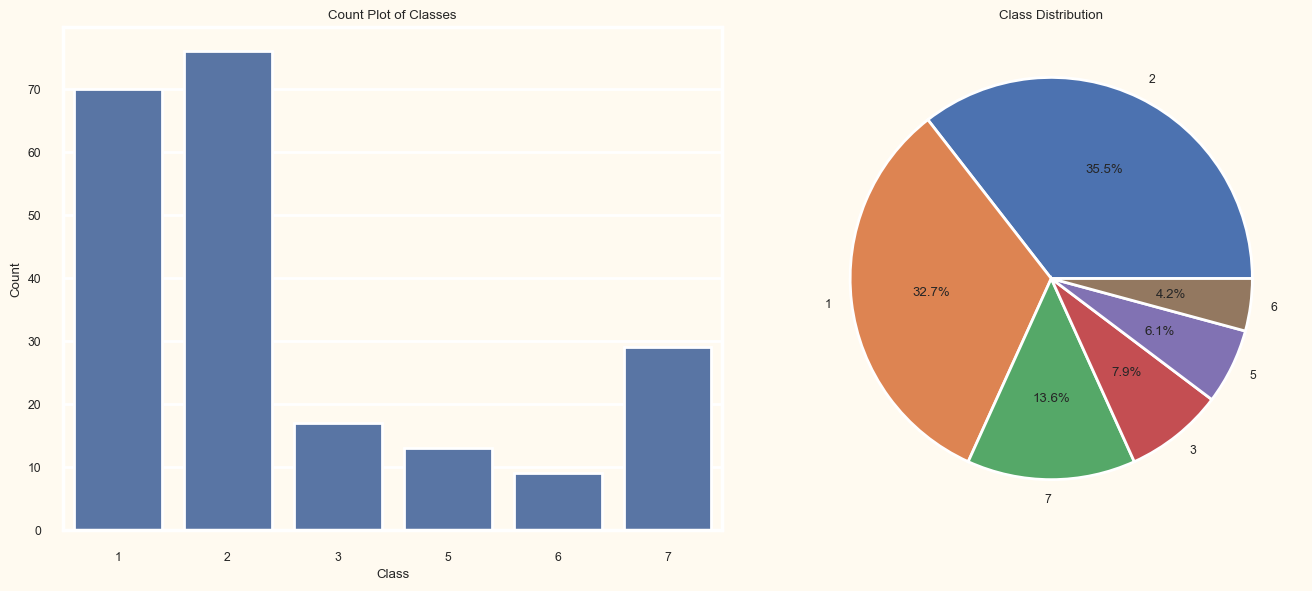

In [13]:
figure, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='class', data=df, ax=axs[0])
axs[0].set_title('Count Plot of Classes')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

class_counts = df['class'].value_counts()
class_counts.plot.pie(ax=axs[1], autopct='%1.1f%%', explode=(0,0,0,0,0,0))
axs[1].set_title('Class Distribution')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

By observe the plot,
- glass type 1 and 2 i.e. building window glass has more count than other type of glass in our dataset.
- The chart reveals that Class 1 and 2 accounts for 35.6% and 32.7% of the dataset, indicating it is the most prevalent glass type, while Class 6 represents only 4.2%, making it the least common.

In [14]:
mg_percent = df.groupby('class')['Mg'].mean()
print('Average percent of Magnesium : \n')
print('------------------------------------')
mg_percent

Average percent of Magnesium : 

------------------------------------


class
1    3.552429
2    3.002105
3    3.543529
5    0.773846
6    1.305556
7    0.538276
Name: Mg, dtype: float64

- Here we calculate the average magnesium content for each glass type and observe that the glass type 1 and 3 has more average mg content compared to other types.

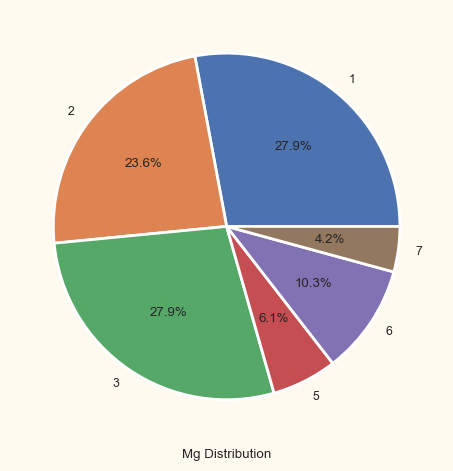

In [15]:
plt.figsize=(14, 6)

mg_percent.plot.pie(autopct='%1.1f%%')
plt.xlabel('Mg Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

by observe the plot,
- Type 1 and Type 3 glasses has the highest magnesium content, 27.9% of the total, while Type 7 has the lowest at 4.2%.
- Type 1 and Type 3 together account for nearly 27.9% of the total magnesium content, indicating requirement for higher magnesium in these types.

In [16]:
al_percent = df.groupby('class')['Al'].mean()
print('Average percent of Aluminium : \n')
print('------------------------------------')
al_percent

Average percent of Aluminium : 

------------------------------------


class
1    1.163857
2    1.408158
3    1.201176
5    2.033846
6    1.366667
7    2.122759
Name: Al, dtype: float64

- Here we calculate the average aluminium content for each glass type and observe that the glass type 7 has highest average aluminium content compared to other types

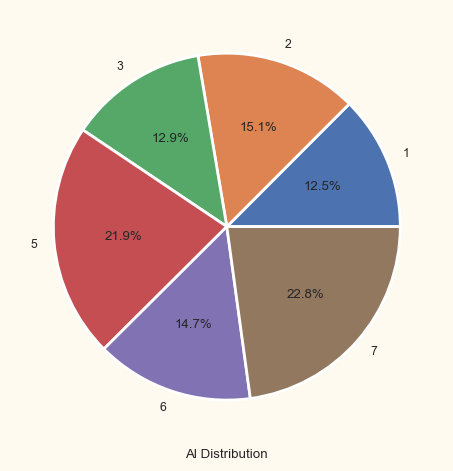

In [17]:
plt.figsize=(14, 6)

al_percent.plot.pie(autopct='%1.1f%%')
plt.xlabel('Al Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

by observe the plot,

- Type 7 glass has the highest aluminium content, 22.8% of the total, while Type 1 has the lowest at 12.5%.

In [18]:
ca_percent = df.groupby('class')['Ca'].mean()
print('Average percent of Calcium : \n')
print('------------------------------------')
ca_percent

Average percent of Calcium : 

------------------------------------


class
1     8.797286
2     9.073684
3     8.782941
5    10.123846
6     9.356667
7     8.491379
Name: Ca, dtype: float64

- Here we calculate the average calcium content for each glass type and observe that the glass type 5 has highest average calcium content compared to other types

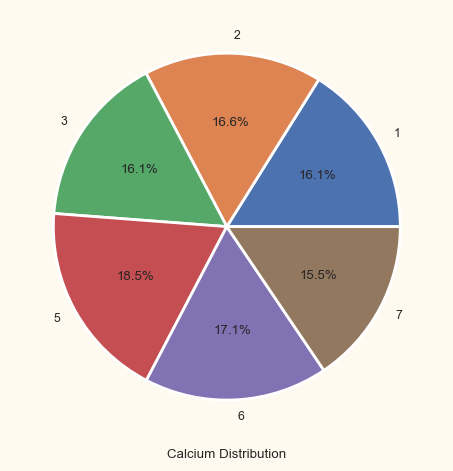

In [19]:
plt.figsize=(14, 6)

ca_percent.plot.pie(autopct='%1.1f%%')
plt.xlabel('Calcium Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

by observe the plot,

- Type 5 glass has the highest calcium content, 18.5% of the total, while Type 7 has the lowest at 15.5%

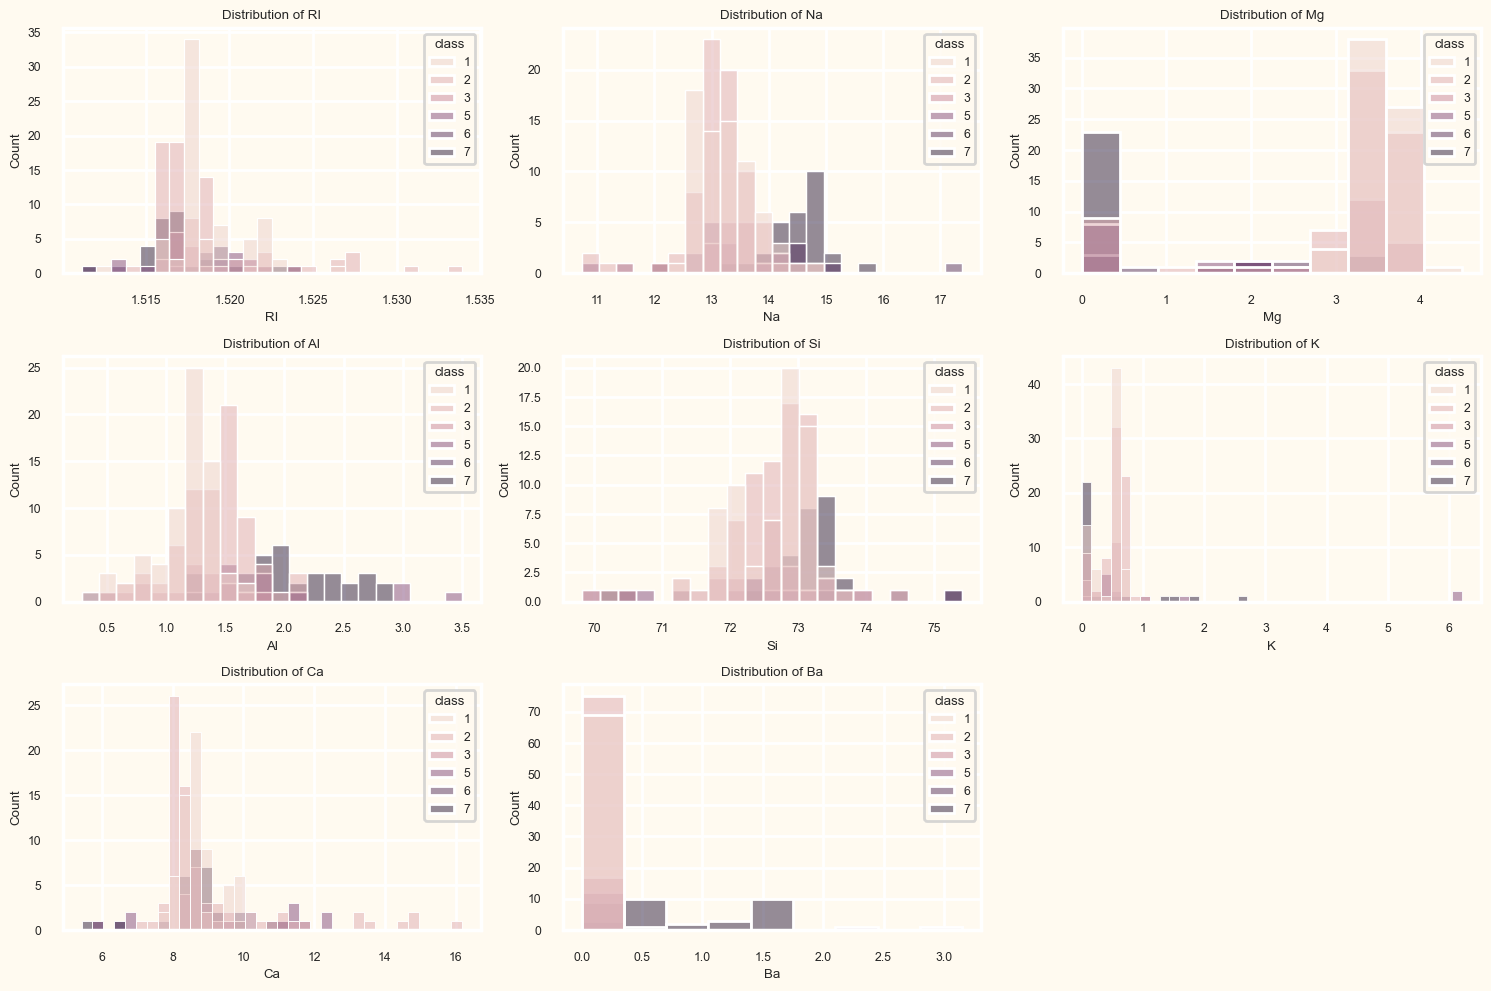

In [20]:
plt.figure(figsize=(15, 10))
p=1
for col in df.select_dtypes(include=['float64']).columns:
    if p < 9 :
        ax = plt.subplot(3,3,p)
        sns.histplot(x= df[col], hue= df['class'])
        plt.title(f"Distribution of {col}")
    p +=1    
    
plt.tight_layout()

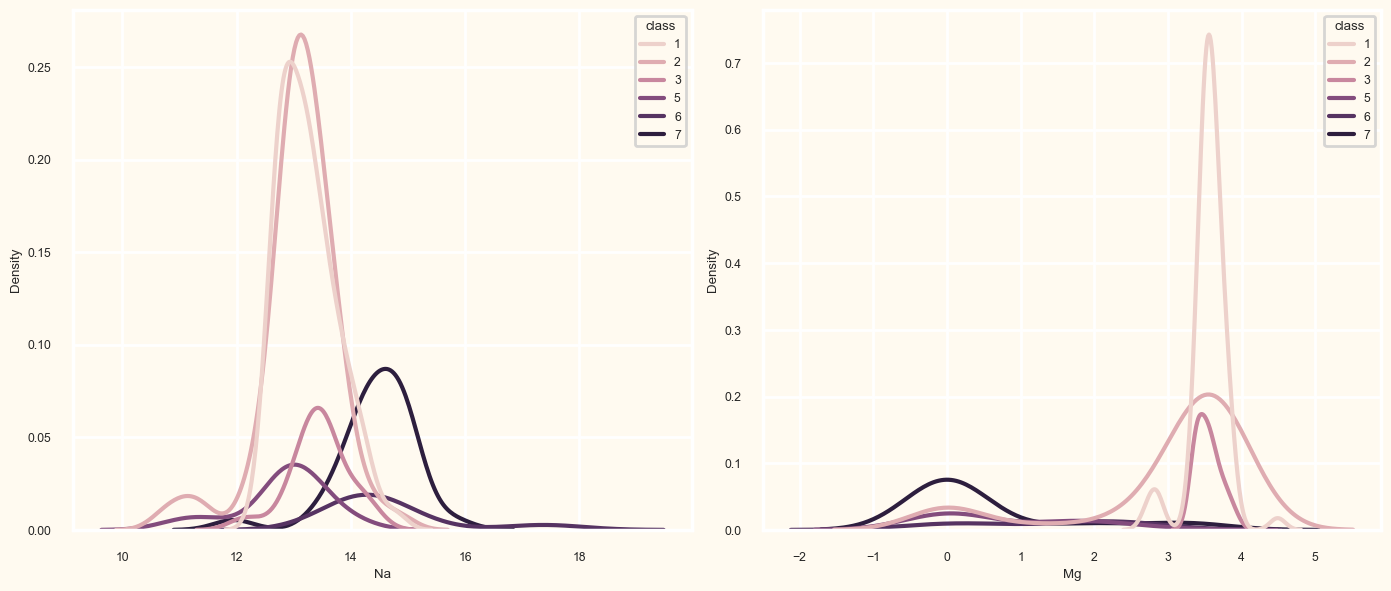

In [21]:
figure, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(x='Na', data=df, hue='class', ax=axs[0])
sns.kdeplot(x='Mg', data=df, hue='class', ax=axs[1])

plt.tight_layout()
plt.show()

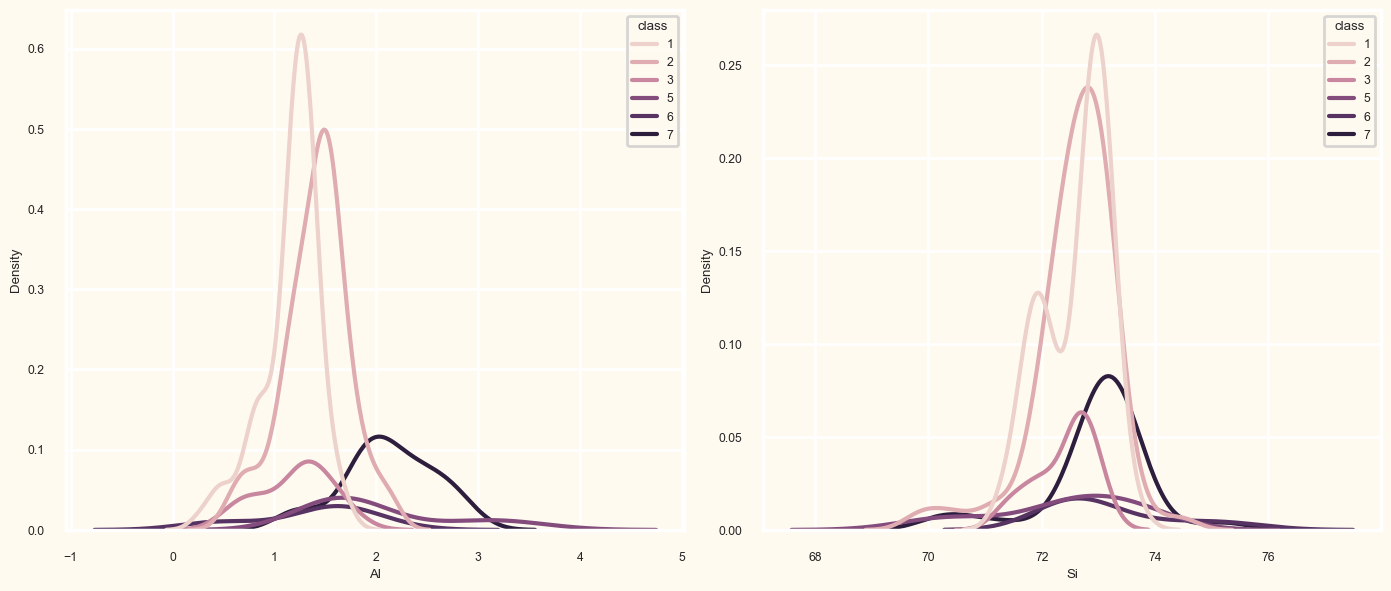

In [22]:
figure, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(x='Al', data=df, hue='class', ax=axs[0])
sns.kdeplot(x='Si', data=df, hue='class', ax=axs[1])

plt.tight_layout()
plt.show()

Bi-variate Analysis

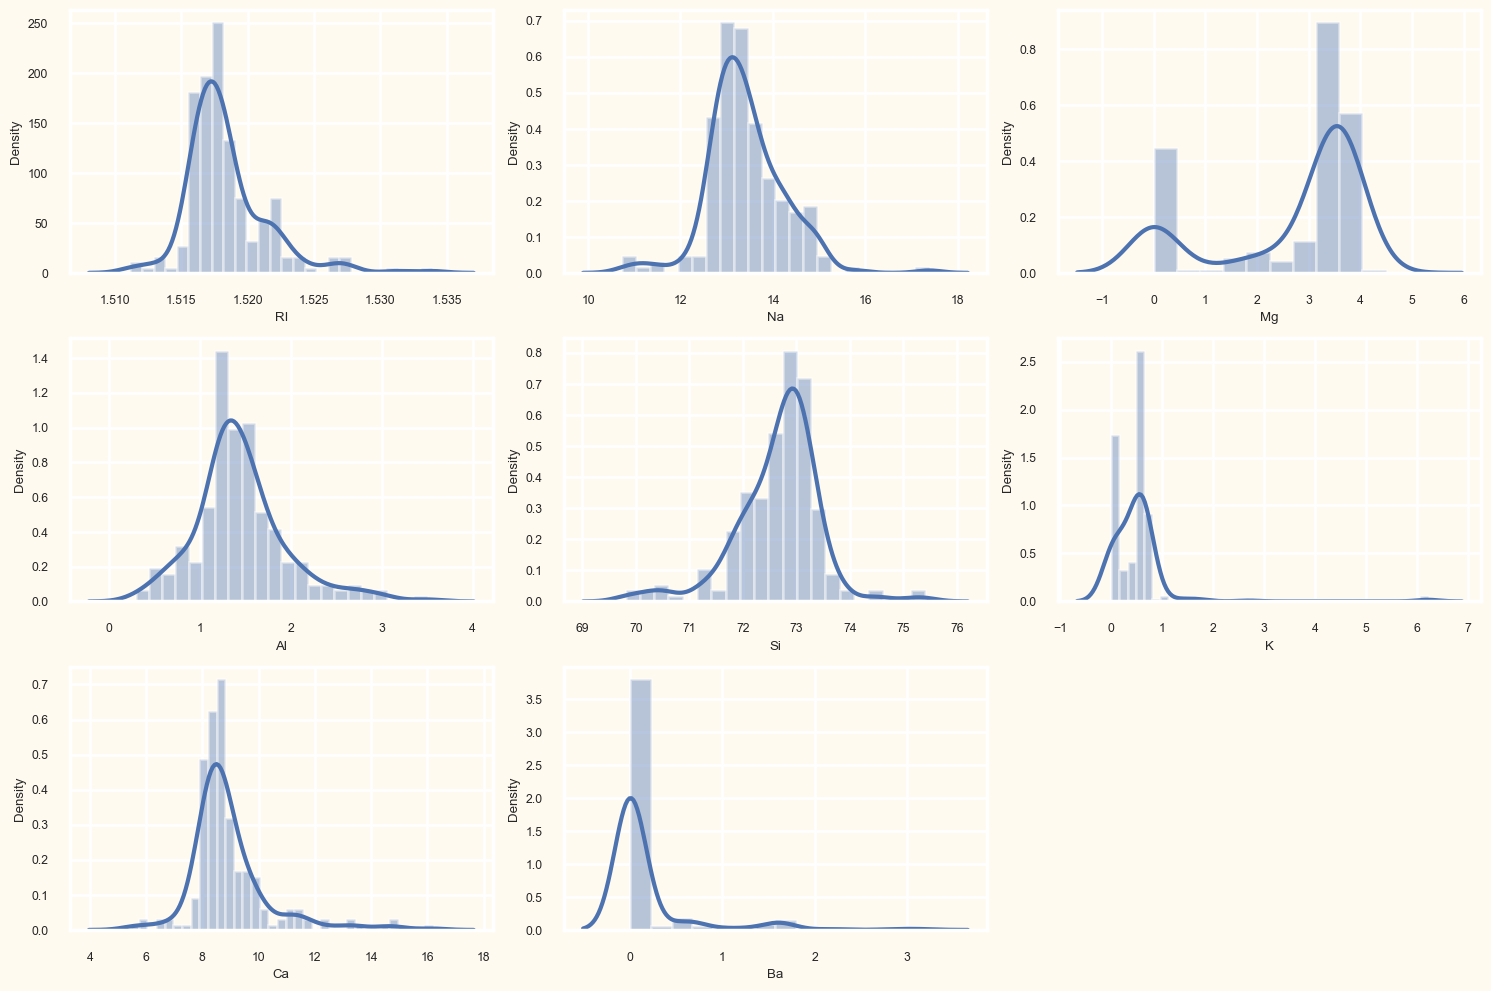

In [23]:
plt.figure(figsize=(15, 10))
p=1
for col in df.select_dtypes(include=['float64']).columns:
    if p < 9 :
        ax = plt.subplot(3,3,p)
        sns.distplot(df[col])
    p +=1    
    
plt.tight_layout()

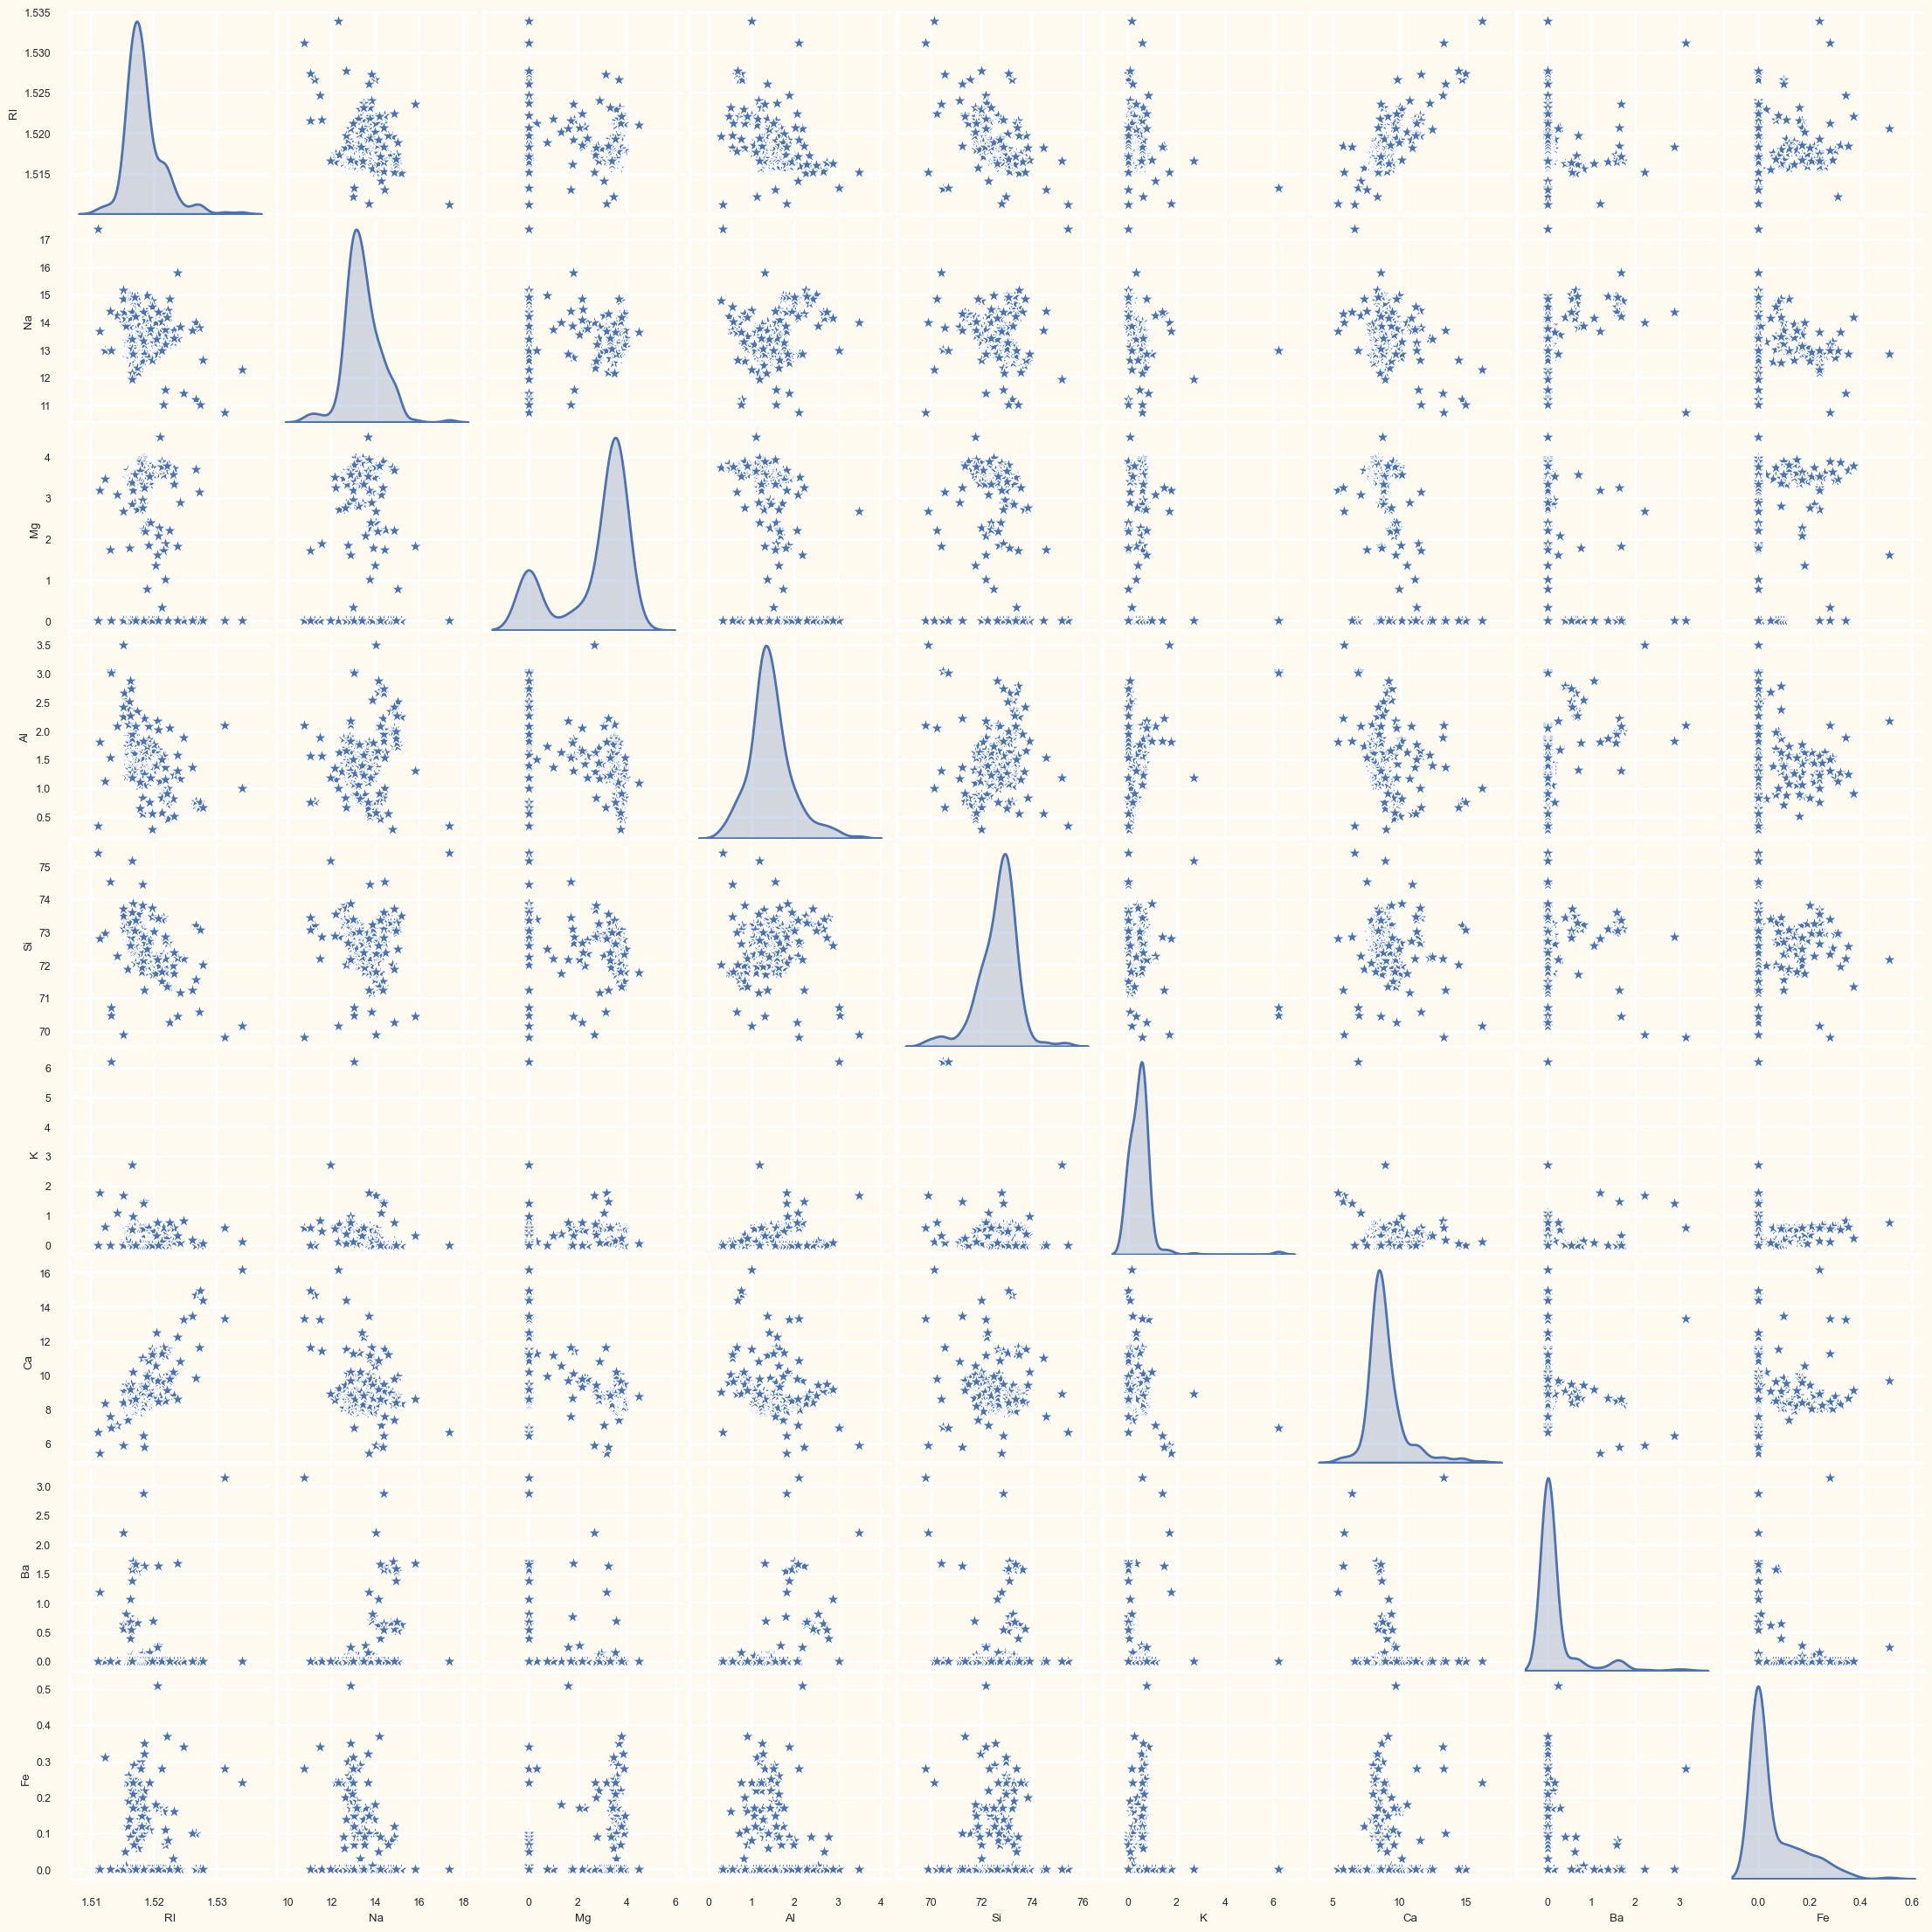

In [24]:
sns.pairplot(df.select_dtypes(include=['float64']),markers="*", diag_kind='kde')
plt.show()

# check correlation

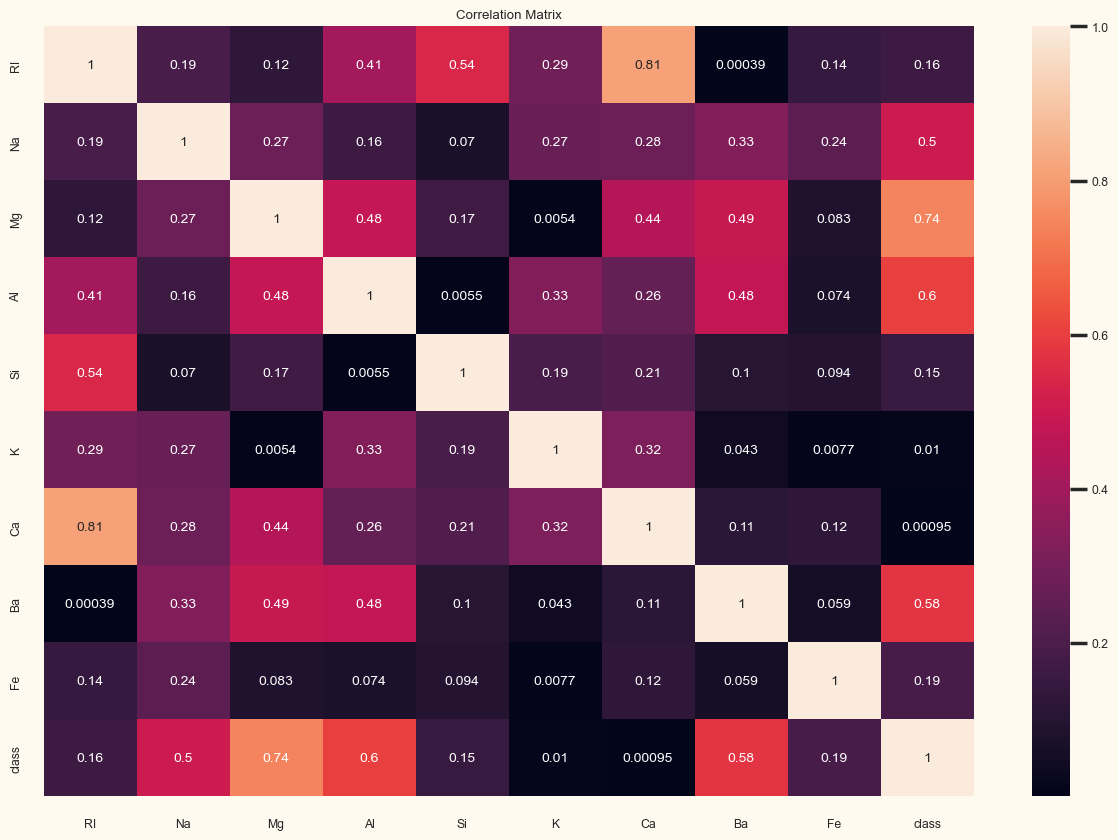

In [25]:
df2 = df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df2, annot=True, annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

By observe the correlation matrix,
   - Rl & Ca are most correlated in this feature.
   - Mg and AI are correlated with target variable.

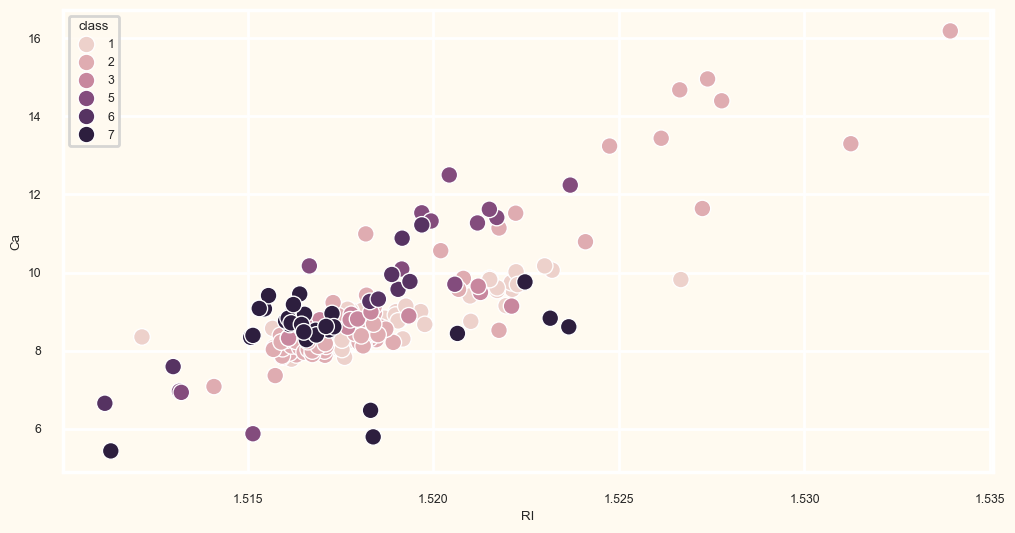

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='RI', y='Ca', data=df, hue='class')
plt.show()

By observe the plot,
 - Building & vehicle windows are over 1.515 in RI range & over 8 in Ca.
 - Other type RI & Ca index are each below 1.525 & 12.
 - it shows the trends of positive correlation and linear relationship.So we can drop any one feature.

# check outliers

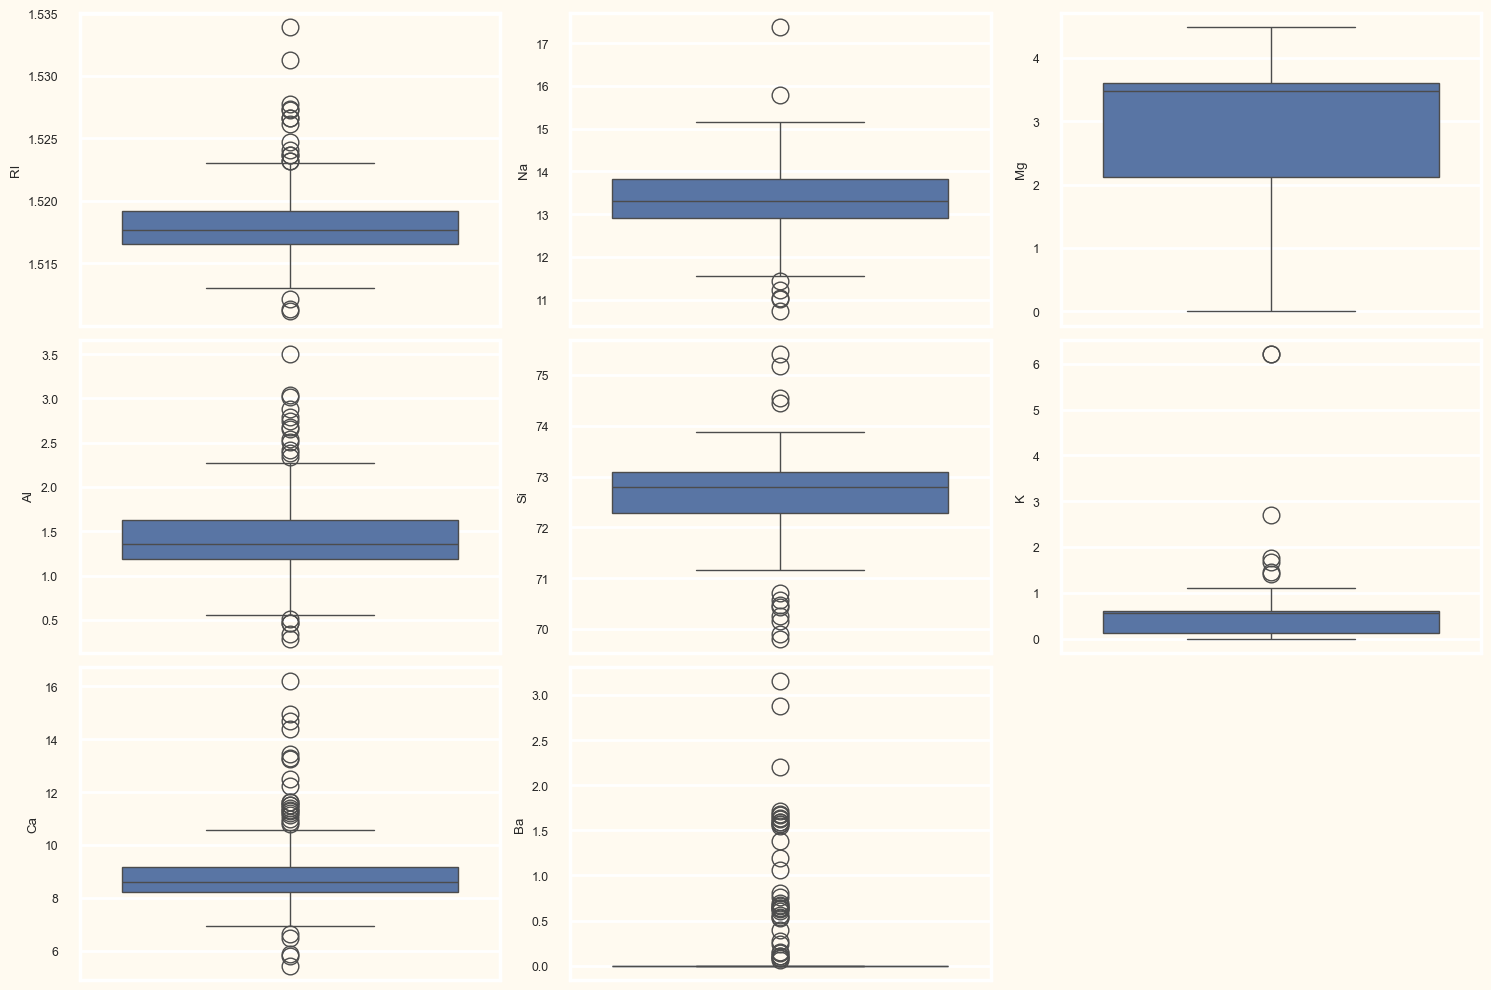

In [27]:
plt.figure(figsize=(15, 10))
p=1
for col in df.select_dtypes(include=['float64']).columns:
    if p < 9 :
        ax = plt.subplot(3,3,p)
        sns.boxplot(df[col])
    p +=1    
    
plt.tight_layout()

- Here in box plot we can say that there are outliers present in the dataset, but we have only 214 observations to build the model, we cannot lose the data from dataset. So we won't delete the outliers as of now

In [28]:
df['type'] = [1 if x >= 5 else 0 for x in df['class']]
df.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class,type
51,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11,1,0
130,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.00,0.00,2,0
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1,0
71,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2,0
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7,1


In [29]:
df['type'] = df['type'].astype('category')

In [30]:
X = df.drop(columns=['class','type'], axis=1)
y = df['type']

In [31]:
y.value_counts()

0    163
1     51
Name: type, dtype: int64

- Here we observe the data is imbalanced.So need to balance the dataset using resampling method.

In [32]:
# balance the dataset
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(X,y)

# check VIF value for multicolinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

,Feature,VIF
0,RI,875460.120450
1,Na,17915.047326
2,Mg,679.628885
3,Al,247.732247
4,Si,442044.482973
5,K,89.293994
6,Ca,9644.161635
7,Ba,57.291769
8,Fe,1.565194


In [34]:
x1.drop('RI',axis=1, inplace=True)

In [35]:
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

,Feature,VIF
0,Na,394.623146
1,Mg,7.638287
2,Al,20.124484
3,Si,813.781584
4,K,1.870610
5,Ca,95.134690
6,Ba,2.524798
7,Fe,1.386786


In [36]:
x1.drop('Si',axis=1, inplace=True)

In [37]:
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

,Feature,VIF
0,Na,73.880071
1,Mg,4.376220
2,Al,17.569614
3,K,1.637448
4,Ca,39.587857
5,Ba,2.503777
6,Fe,1.375235


In [38]:
x1.drop('Na',axis=1,inplace=True)

In [39]:
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

,Feature,VIF
0,Mg,2.744900
1,Al,12.585889
2,K,1.631931
3,Ca,11.589475
4,Ba,2.120653
5,Fe,1.331648


# check skewness

In [40]:
x1.skew()

Mg   -0.237057
Al    0.439394
K     5.195924
Ca    1.323832
Ba    1.818842
Fe    2.268540
dtype: float64

In [41]:
x1['K'] = np.cbrt(x1['K'])

In [42]:
x1['Ca'] = np.cbrt(x1['Ca'])

In [43]:
x1['Ca'] = np.sqrt(x1['Ca'])

In [53]:
x1['Ba'] = np.cbrt(x1['Ba'])

In [54]:
x1['Fe'] = np.cbrt(x1['Fe'])

In [55]:
x1.skew()

Mg   -0.237057
Al    0.439394
K     0.072757
Ca    0.457720
Ba    0.550163
Fe    0.765999
dtype: float64

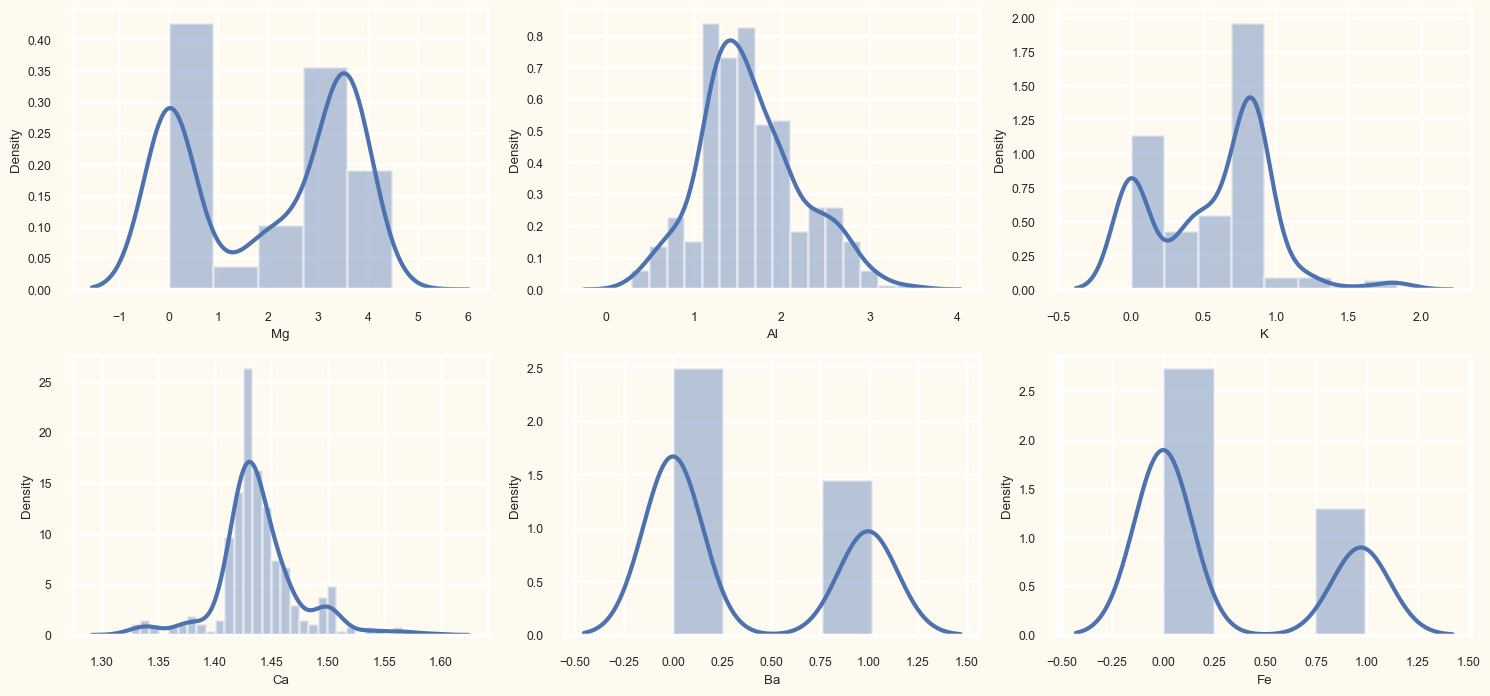

In [56]:
plt.figure(figsize=(15, 10))
p=1
for col in x1.columns:
    if p < 9 :
        ax = plt.subplot(3,3,p)
        sns.distplot(x1[col])
    p +=1    
    
plt.tight_layout()

# Feature Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

In [58]:
x_scaled

,Mg,Al,K,Ca,Ba,Fe
0,1.000000,0.252336,0.212987,0.414442,0.000000,0.000000
1,0.801782,0.333333,0.425974,0.314980,0.000000,0.000000
2,0.790646,0.389408,0.397488,0.309300,0.000000,0.000000
3,0.821826,0.311526,0.451088,0.358273,0.000000,0.000000
4,0.806236,0.295950,0.445749,0.341828,0.000000,0.000000
...,...,...,...,...,...,...
321,0.000000,0.753895,0.226331,0.455821,0.978264,0.974777
322,0.058454,0.417044,0.255348,0.641341,0.000000,0.989822
323,0.619481,0.354525,0.362310,0.444823,0.000000,0.000000
324,0.000000,0.515141,0.000000,0.393858,0.991508,0.973402


# find best random state

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size= 0.30)

In [61]:
param = {
     'random_state': range(0, 200)
}

g = GridSearchCV(RandomForestClassifier(), param, cv=5, scoring='accuracy')
g.fit(x_train,y_train)

print('Best random state : ',g.best_params_['random_state'])

Best random state :  141


# Model Buliding

In [62]:
# again train in train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.30, random_state=141)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold

In [64]:
def metrics_score(clf, x_train, y_train, actual, pred):
    train_accu= accuracy_score(clf.predict(x_train),y_train)*100
    test_accu= accuracy_score(actual,pred)*100
    cm = confusion_matrix(actual,pred)
    c_report = classification_report(actual,pred)
    return train_accu,test_accu,cm,c_report

In [65]:
def cross_val(model, x1, y1, actual, pred):
    k = KFold(n_splits=5)
    score = cross_val_score(model, X, y, cv=k)
    print("Cross Validation Score : {}".format(score))
    print("Average Cross Validation Score : {}".format(score.mean()))
    print("\n------------------")
    difference = accuracy_score(actual, pred) - score.mean()
    return difference

In [66]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Extra Trees Classifier', ExtraTreesClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('K-Nearest Neighbors Classifier', KNeighborsClassifier())
]

# Model Evalution

In [67]:
for name, clf in models:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    train_accu, test_accu, cm, c_report = metrics_score(clf, x_train, y_train, y_test, y_pred)
    print(f"{name} Metrics:")
    print('---------------------------------------------------')
    print(f"Train Accuracy: {train_accu:.2f}%")
    print(f"Test Accuracy: {test_accu:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", c_report)
    
    difference = cross_val(clf, x_train, y_train, y_test, y_pred)
    print(f"Difference between test accuracy and average cross-validation score: {difference:.4f}")
    print("="*50)

Logistic Regression Metrics:
---------------------------------------------------
Train Accuracy: 95.97%
Test Accuracy: 90.77%
Confusion Matrix:
 [[47  1]
 [ 5 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        48
           1       0.92      0.71      0.80        17

    accuracy                           0.91        65
   macro avg       0.91      0.84      0.87        65
weighted avg       0.91      0.91      0.90        65

Cross Validation Score : [1.         0.97674419 0.79069767 0.86046512 0.5952381 ]
Average Cross Validation Score : 0.8446290143964562

------------------
Difference between test accuracy and average cross-validation score: 0.0631
Random Forest Classifier Metrics:
---------------------------------------------------
Train Accuracy: 100.00%
Test Accuracy: 95.38%
Confusion Matrix:
 [[47  1]
 [ 2 15]]
Classification Report:
               precision    recall  f1-score   support

      

# From the observations we can conclude that "Gradient Boosting Classification" is our best fit and best performing model and it has a slightly higher average cross-validation score,Gradient Boosting has a higher test accuracy from other models.

# Model Tuning

In [68]:
param = {
    'loss' : ['log_loss', 'exponential'],
    'learning_rate' : [0.01,0.1,1.0],
    'n_estimators' : [200,100,150],
    'criterion' : ['squared_error', 'friedman_mse'],
    'min_samples_split' : [2,3,1],
    'min_samples_leaf' : [3,2,1,],
    'max_features' : ['sqrt', 'log2']
}

In [70]:
gscv = GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [3, 2, 1],
                         'min_samples_split': [2, 3, 1],
                         'n_estimators': [200, 100, 150]},
             scoring='accuracy')

In [71]:
gscv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 1.0,
 'loss': 'exponential',
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150}

In [72]:
d = GradientBoostingClassifier(criterion= 'squared_error', learning_rate= 1.0, loss= 'exponential', max_features= 'log2', min_samples_leaf= 3, min_samples_split= 3, n_estimators= 150)
d.fit(x_train,y_train)
pred = d.predict(x_test)
print('Testing Accuracy : {:.2f} %'.format(round(accuracy_score(y_test, pred) * 100, 2)))
print('-----------------------------------------------')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Testing Accuracy : 96.92 %
-----------------------------------------------
[[47  1]
 [ 1 16]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.94      0.94      0.94        17

    accuracy                           0.97        65
   macro avg       0.96      0.96      0.96        65
weighted avg       0.97      0.97      0.97        65



# Save the final model

In [73]:
import joblib
joblib.dump(d,'Glass Identification.pkl')

['Glass Identification.pkl']

In [74]:
load= joblib.load('Glass Identification.pkl')

In [75]:
pred = load.predict(x_test)

actual = np.array(y_test)

In [76]:
pd.DataFrame({
    'Actual' : actual,
    'Prediction' : pred
})

,Actual,Prediction
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
60,1,1
61,0,0
62,1,1
63,0,0
